[codebasics](https://www.youtube.com/watch?v=J5bXOOmkopc&list=PLeo1K3hjS3uvCeTYTeyfe0-rN5r8zn9rw&index=9)

In [10]:
%matplotlib inline
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits = load_digits()
print(digits.data.shape)
print(digits.target.shape)

(1797, 64)
(1797,)


0.95555556
[[27  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  1  0  1  2]
 [ 0  0 35  1  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  0 37  0  0  0  3]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  1  0  0 38  0  0]
 [ 0  2  1  0  0  0  0  0 35  1]
 [ 0  0  0  0  0  1  0  0  0 40]]


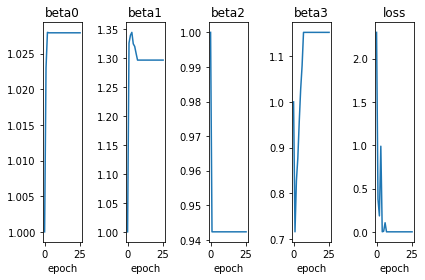

In [1]:
%matplotlib inline
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
tf.set_random_seed(0)


x = tf.placeholder(tf.float32, shape=(None,64)) 
y = tf.placeholder(tf.float32, shape=(None,10)) # 0001000000
y_cls = tf.placeholder(tf.int32, shape=(None,)) # 3 

if 1:
    beta = tf.get_variable('beta', (64,10), dtype=tf.float32, initializer=tf.keras.initializers.constant(1.0))
elif 0:
    beta = tf.get_variable('beta', (64,10), dtype=tf.float32, initializer=tf.keras.initializers.constant(0.5))
elif 1:
    beta = tf.get_variable('beta', (64,10), dtype=tf.float32, initializer=tf.keras.initializers.RandomUniform())
elif 1:
    beta = tf.get_variable('beta', (64,10), dtype=tf.float32, initializer=tf.keras.initializers.RandomNormal())

logits = x @ beta # (?,10) = (?,64) @ (64,10)
entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=y) # (?,) 
loss = tf.reduce_mean(entropy) # ()
train = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(loss)

y_pred_prob = tf.nn.softmax(logits)
y_pred_cls = tf.cast(tf.argmax(logits, axis=1), tf.int32)
correct_bool = tf.equal(y_pred_cls, y_cls)
accuracy = tf.reduce_mean(tf.cast(correct_bool, tf.float32))

with tf.Session() as sess:
    
    tf.global_variables_initializer().run()
    
    beta0_trace = []
    beta1_trace = []
    beta2_trace = []
    beta3_trace = []
    beta4_trace = []
    beta5_trace = []
    beta6_trace = []
    beta7_trace = []
    beta8_trace = []
    beta9_trace = []
    loss_trace = []
    
    gradient_step = -1
    for i in range(epoch):
        idx = np.arange(x_train.shape[0])
        np.random.shuffle(idx)
        x_data = x_train[idx]
        y_data = y_train[idx]
        for j in range((x_train.shape[0]//batch_size)-1):
            gradient_step += 1
            feed_dict = {x: x_data[j*batch_size:(j+1)*batch_size], 
                         y: y_data[j*batch_size:(j+1)*batch_size]}
            if gradient_step == 0:
                beta_run, loss_run = sess.run([beta, loss], feed_dict=feed_dict)
                beta0_trace.append(beta_run[23,7])
                beta1_trace.append(beta_run[15,7])
                beta2_trace.append(beta_run[55,7])
                beta3_trace.append(beta_run[33,7])
                loss_trace.append(loss_run) 
            elif gradient_step % 100 == 0:
                beta_run, loss_run, _ = sess.run([beta, loss, train], feed_dict=feed_dict)
                beta0_trace.append(beta_run[23,7])
                beta1_trace.append(beta_run[15,7])
                beta2_trace.append(beta_run[55,7])
                beta3_trace.append(beta_run[33,7])
                loss_trace.append(loss_run) 
            else:
                sess.run(train, feed_dict=feed_dict)
                
    feed_dict = {x: x_test, y: y_test, y_cls: y_test_cls}
    test_accuracy = sess.run(accuracy, feed_dict=feed_dict)
    print(test_accuracy)
    y_test_pred_cls = sess.run(y_pred_cls, feed_dict=feed_dict)
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test_cls, y_test_pred_cls)
    print(cm)

fig, (ax0,ax1,ax2,ax3,ax4) = plt.subplots(1, 5)
ax0.plot(beta0_trace)
ax0.set_xlabel('epoch')
ax0.set_title('beta0')
ax1.plot(beta1_trace)
ax1.set_xlabel('epoch')
ax1.set_title('beta1')
ax2.plot(beta2_trace)
ax2.set_xlabel('epoch')
ax2.set_title('beta2')
ax3.plot(beta3_trace)
ax3.set_xlabel('epoch')
ax3.set_title('beta3')
ax4.plot(loss_trace)
ax4.set_xlabel('epoch')
ax4.set_title('loss')
plt.tight_layout()
plt.show()